<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/Response_Time_Analysis/app_specific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ResponseTime_wrt_time_net/jumbo_feature_full.csv')
df

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,ISP,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,Unnamed: 15,Unnamed: 16,test,test2,hj,test.1,Unnamed: 21,Unnamed: 22
0,Youtube_search channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1008,1,0,Others,8.35,12.20,32.0,53.536932,310.423162,47.857387,NaN,NaN,abhivandan17007@iiitd.ac.in,abhivandan17007@iiitd.ac.in,True,abhivandan17007@iiitd.ac.in,True,abhi@btp.com
1,Youtube_open channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1836,1,0,Others,8.35,12.20,32.0,53.536932,310.423162,47.857387,NaN,NaN,akanksha20048@iiitd.ac.in,akanksha20048@iiitd.ac.in,True,akanksha20048@iiitd.ac.in,True,arani@iiitd.ac.in
2,Youtube_search video page,vandana20106@iiitd.ac.in,11,0.000000,8,1209,1,0,Others,8.35,14.50,31.5,60.708051,336.357735,63.212699,NaN,NaN,akhil20107@iiitd.ac.in,akhil20107@iiitd.ac.in,True,akhil20107@iiitd.ac.in,True,rahul20117@iiitd.ac.in
3,Youtube_play video page,vandana20106@iiitd.ac.in,11,0.000000,8,4080,1,0,Others,8.35,14.50,31.5,60.708051,336.357735,63.212699,NaN,NaN,anjali20082@iiitd.ac.in,anjali20082@iiitd.ac.in,True,anjali20082@iiitd.ac.in,True,rishabh20038@iiitd.ac.in
4,LinkedIn_my profile page,vandana20106@iiitd.ac.in,11,0.000000,8,102,1,0,Others,7.43,16.70,30.2,98.971308,370.749097,98.904576,NaN,NaN,anuj17026@iiitd.ac.in,anuj17026@iiitd.ac.in,True,anuj17026@iiitd.ac.in,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20857,Whatsapp_sending message,akhil20107@iiitd.ac.in,10,0.564232,6,1644,1,1,Jio,55.85,69.85,76.0,574.744244,192.536123,3758.935986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20858,GoogleMaps_searching place,akhil20107@iiitd.ac.in,10,0.564232,6,4386,1,1,Jio,56.15,69.80,74.5,573.754775,231.027901,7175.290809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20859,GoogleNews_opening news page,akhil20107@iiitd.ac.in,10,0.564232,6,2766,1,1,Jio,58.50,70.40,74.8,540.281067,275.775695,7499.583795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20860,Dailyhunt_opening news page,akhil20107@iiitd.ac.in,10,0.564232,6,1896,1,1,Jio,60.25,74.80,76.3,486.110176,296.824275,7479.584976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
distances = df[['DISTANCE']].values[:, 0]
ping_median_google = np.median(df['PING_MEDIAN_GOOGLE'])
ping_median_google

54.15

In [ ]:
df[['FEATURE', 'LATENCY']]

,FEATURE,LATENCY
0,Youtube_search channel page,1008
1,Youtube_open channel page,1836
2,Youtube_search video page,1209
3,Youtube_play video page,4080
4,LinkedIn_my profile page,102
...,...,...
20857,Whatsapp_sending message,1644
20858,GoogleMaps_searching place,4386
20859,GoogleNews_opening news page,2766
20860,Dailyhunt_opening news page,1896


In [ ]:
group = df.groupby('FEATURE').apply(lambda x: x['LATENCY'].unique())
group

FEATURE
Amazon_add to cart clicked           [1120, 2028, 2314, 1011, 1041, 1929, 1190, 106...
Amazon_go to cart clicked            [2245, 3571, 3487, 3310, 4248, 3688, 2473, 278...
Amazon_product profile page          [4168, 5419, 4894, 3655, 3397, 4847, 3262, 236...
Amazon_remove from cart clicked      [1063, 1609, 1792, 1751, 983, 1606, 1581, 1613...
Amazon_search results page           [1138, 1185, 865, 1072, 4954, 1077, 4377, 1771...
Dailyhunt_opening news page          [3044, 4814, 3272, 2268, 2291, 3093, 2113, 293...
Facebook_person profile page         [830, 1766, 834, 883, 3564, 853, 875, 861, 835...
Facebook_post in a group             [1901, 1935, 3314, 2159, 1556, 1501, 55, 103, ...
Facebook_search results page         [3323, 3014, 3972, 3109, 3159, 2618, 2734, 259...
Flipkart_add to cart clicked         [1114, 3028, 4808, 3608, 1072, 2979, 2937, 302...
Flipkart_go to cart clicked          [1505, 1253, 1230, 1261, 1288, 1242, 1332, 124...
Flipkart_product profile page      

In [ ]:
df = group.apply(pd.Series)

df.reset_index(inplace=True)
df[['APP', 'ACTION']] = df['FEATURE'].str.split('_', expand=True)
df[['APP', 'ACTION']]

,APP,ACTION
0,Amazon,add to cart clicked
1,Amazon,go to cart clicked
2,Amazon,product profile page
3,Amazon,remove from cart clicked
4,Amazon,search results page
5,Dailyhunt,opening news page
6,Facebook,person profile page
7,Facebook,post in a group
8,Facebook,search results page
9,Flipkart,add to cart clicked


In [ ]:
plt.rcParams.update({'figure.autolayout': True})
mlt.rcParams['figure.figsize'] = 14, 10
boxprops = dict(linewidth=4)
medianprops = dict(linewidth=4)

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
df

,FEATURE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,APP,ACTION
0,Amazon_add to cart clicked,9278.0,12654.0,17049.0,15231.0,1098.0,1481.0,4650.0,7838.0,2869.0,6070.0,9938.0,1704.0,1710.0,4275.0,1533.0,3107.0,6019.0,2393.0,26449.0,1668.0,3053.0,3132.0,1010.0,1174.0,1709.0,1802.0,1615.0,4529.0,3328.0,32471.0,3262.0,2023.0,2856.0,1088.0,4343.0,1893.0,2051.0,4443.0,3403.0,1566.0,2402.0,1133.0,969.0,1090.0,NaN,NaN,NaN,NaN,NaN,NaN,Amazon,add to cart clicked
1,Amazon_go to cart clicked,2186.0,2113.0,2559.0,3112.0,3656.0,2234.0,1447.0,2568.0,3287.0,5051.0,2185.0,1927.0,2778.0,3316.0,4458.0,3922.0,2478.0,3036.0,16251.0,2424.0,2663.0,1843.0,3278.0,1766.0,5112.0,1659.0,18886.0,2452.0,3461.0,1709.0,3702.0,2276.0,1851.0,1996.0,2544.0,4420.0,2457.0,2685.0,1152.0,2698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon,go to cart clicked
2,Amazon_product profile page,1339.0,1407.0,2696.0,1931.0,2925.0,1913.0,4203.0,2311.0,1567.0,5246.0,2634.0,3051.0,747.0,3888.0,2739.0,3062.0,5629.0,3824.0,2720.0,3444.0,2216.0,3010.0,2493.0,1656.0,2852.0,2215.0,2393.0,2013.0,3373.0,1963.0,1810.0,2912.0,1179.0,2217.0,7704.0,5165.0,1560.0,1410.0,1785.0,1983.0,4955.0,8921.0,3519.0,2228.0,NaN,NaN,NaN,NaN,NaN,NaN,Amazon,product profile page
3,Amazon_remove from cart clicked,1056.0,1136.0,1508.0,1105.0,1093.0,1498.0,1082.0,2029.0,1079.0,1122.0,1061.0,1423.0,2221.0,1032.0,3497.0,1075.0,1618.0,1119.0,1560.0,1163.0,1040.0,1388.0,1021.0,4461.0,1179.0,1587.0,1130.0,1543.0,2109.0,2097.0,1962.0,926.0,1769.0,952.0,943.0,1487.0,940.0,1073.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon,remove from cart clicked
4,Amazon_search results page,1952.0,1090.0,1261.0,1635.0,2205.0,1648.0,2096.0,1672.0,1283.0,1400.0,1154.0,1170.0,2744.0,2670.0,1290.0,1315.0,3286.0,1208.0,1795.0,2654.0,1726.0,6850.0,1415.0,1260.0,1275.0,1598.0,1262.0,1503.0,1223.0,1181.0,1335.0,1034.0,1697.0,1169.0,2580.0,1682.0,1936.0,2026.0,1060.0,3210.0,1498.0,1375.0,1511.0,1190.0,4376.0,2588.0,737.0,NaN,NaN,NaN,Amazon,search results page
5,Dailyhunt_opening news page,2268.0,3093.0,2113.0,2129.0,2371.0,2170.0,1944.0,2431.0,2603.0,2772.0,2186.0,2176.0,2512.0,3098.0,2684.0,2303.0,2307.0,975.0,2282.0,2022.0,1864.0,2101.0,2554.0,1999.0,1630.0,1852.0,1703.0,1935.0,3638.0,1685.0,2607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dailyhunt,opening news page
6,Facebook_person profile page,5883.0,1468.0,1205.0,909.0,899.0,3518.0,1046.0,1867.0,846.0,839.0,1391.0,3542.0,858.0,890.0,1513.0,3895.0,981.0,2561.0,1963.0,1952.0,1728.0,3548.0,1423.0,1643.0,3020.0,945.0,832.0,1713.0,845.0,843.0,826.0,833.0,829.0,804.0,827.0,849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facebook,person profile page
7,Facebook_post in a group,1337.0,1245.0,2548.0,1825.0,1697.0,1536.0,1579.0,1476.0,1407.0,1367.0,1508.0,2129.0,1588.0,1173.0,295.0,1901.0,3050.0,1532.0,1416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facebook,post in a group
8,Facebook_search results page,1995.0,2946.0,2395.0,1695.0,765.0,2607.0,3075.0,3238.0,785.0,4173.0,2554.0,3027.0,2714.0,3132.0,2541.0,2724.0,2770.0,3669.0,4372.0,4561.0,3123.0,3472.0,2848.0,3458.0,3848.0,2092.0,2593.0,2397.0,2553.0,2623.0,3126.0,2234.0,2656.0,2332.0,2589.0,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facebook,search results page
9,Flipkart_add to cart clicked,3608.0,1072.0,2937.0,3027.0,4384.0,1047.0,1738.0,2999.0,1411.0,998.0,1046.0,965.0,1032.0,3063.0,3040.0,1009.0,1040.0,2938.0,3038.0,1011.0,1005.0,843.0,983.0,825.0,1549.0,943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flipkart,add to cart clicked


Median Value:  2862.5
Median Value:  2563.5
Median Value:  2563.5
Median Value:  1149.5
Median Value:  1503.0
2862.5 ['Add to\nCart', 'Go to\nCart', 'Product\nProfile', 'Remove\nFrom\nCart', 'Search\nProduct']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


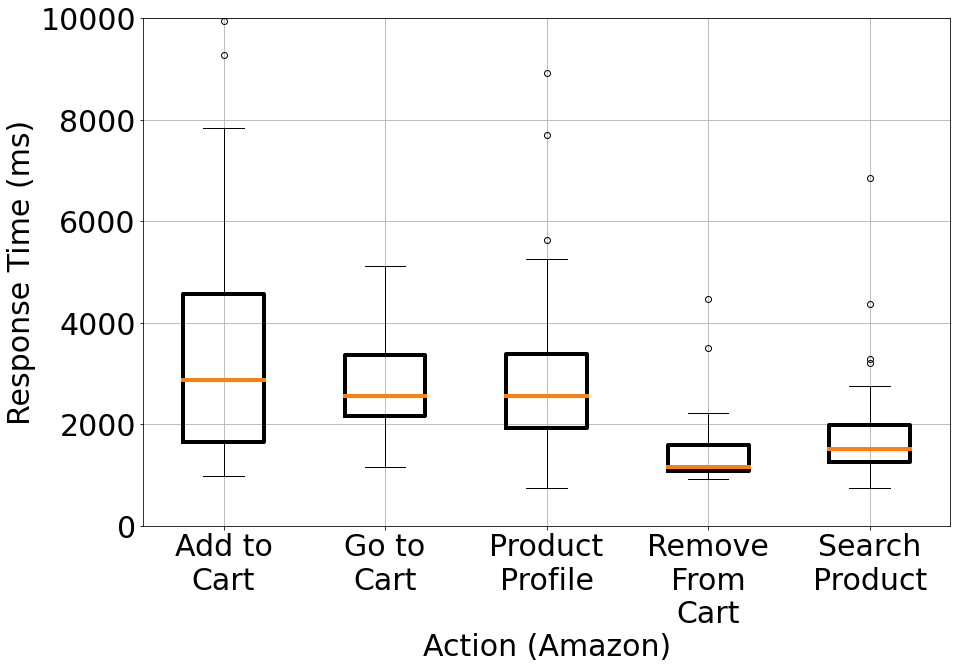

In [ ]:
df = df.fillna(0)
filtered_data = [0] * 5
xlabels = [0] * 5
for rownum in range(5):
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[rownum] = values
    xlabels[rownum] = df.iloc[rownum, -1]
xlabels=['Add to\nCart', 'Go to\nCart', 'Product\nProfile', 'Remove\nFrom\nCart', 'Search\nProduct']
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.grid()
plt.xlabel('Action (Amazon)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 10000])

print(np.median(filtered_data[0]), xlabels)

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'amazon_morning.pdf', bbox_inches='tight')

Median Value:  1059.5
Median Value:  1835.5
Median Value:  3001.0
Median Value:  190.5
Median Value:  230.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


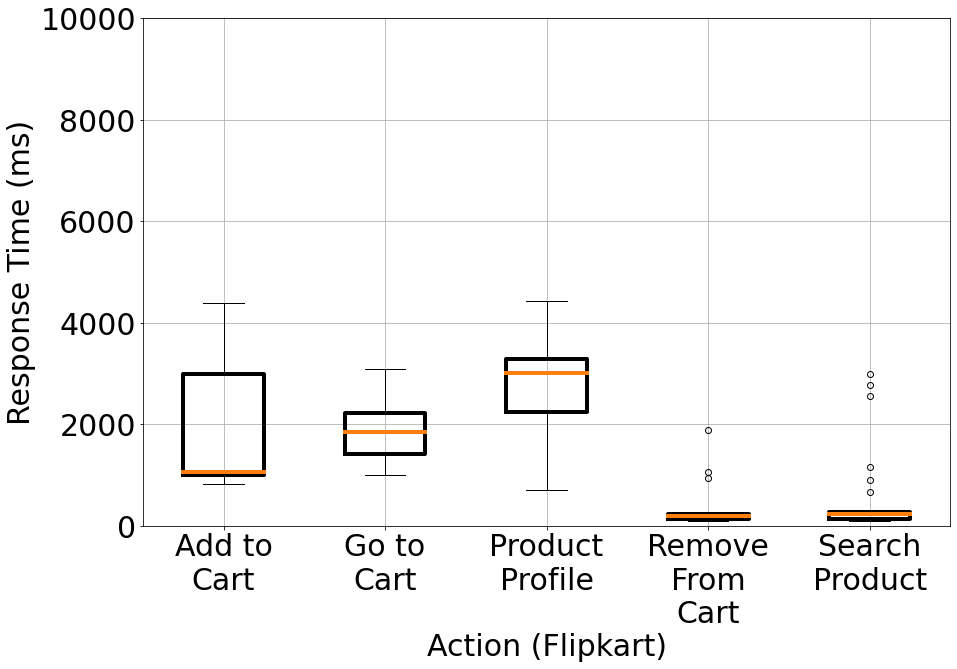

In [ ]:
rowvalues = df[df['APP'] == 'Flipkart'].index.values
filtered_data = [0] * 5
xlabels = [0] * 5
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Add to\nCart', 'Go to\nCart', 'Product\nProfile', 'Remove\nFrom\nCart', 'Search\nProduct']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Flipkart)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'flipkart_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'Youtube'].index.values[1:]
rowvalues

array([27, 28, 29])

Median Value:  2466.0
Median Value:  1181.0
Median Value:  1226.0
2466.0 ['Play\nVideo', 'Search\nChannel', 'Search\nVideo']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


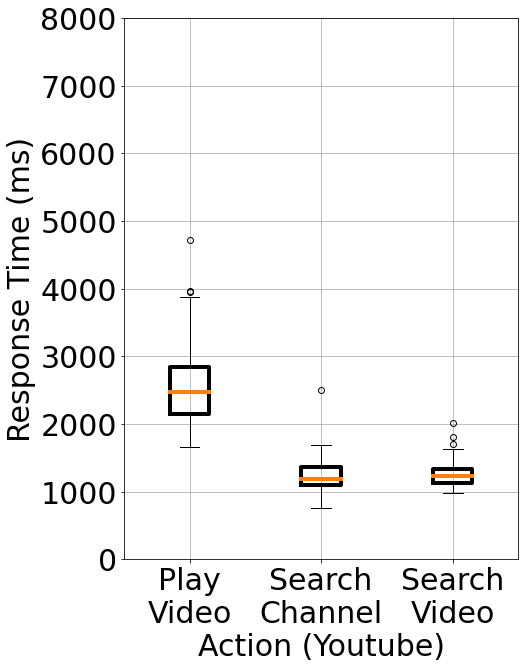

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Play\nVideo', 'Search\nChannel', 'Search\nVideo']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Youtube)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 8000])

print(np.median(filtered_data[0]), xlabels)
#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'youtube_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'Hotstar'].index.values
rowvalues

array([16, 17, 18])

Median Value:  3347.0
Median Value:  546.5
Median Value:  1171.0
3


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


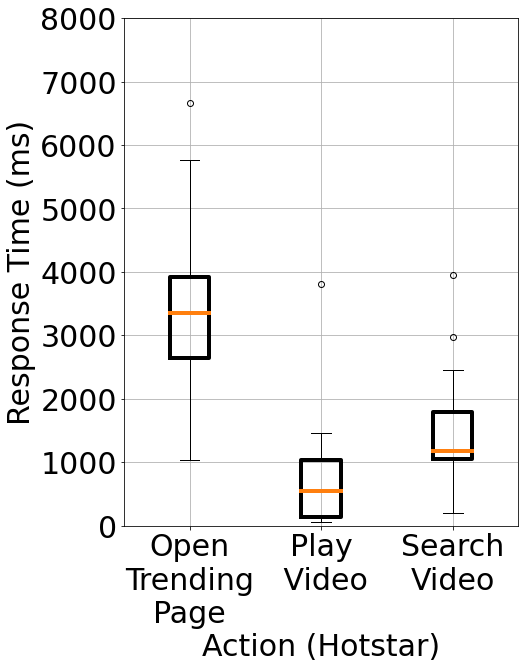

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
print(count)
xlabels=['Open\nTrending\nPage', 'Play\n Video', 'Search\nVideo']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Hotstar)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 8000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'hotstar_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'Facebook'].index.values
rowvalues

array([6, 7, 8])

Median Value:  1125.5
Median Value:  1532.0
Median Value:  2685.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


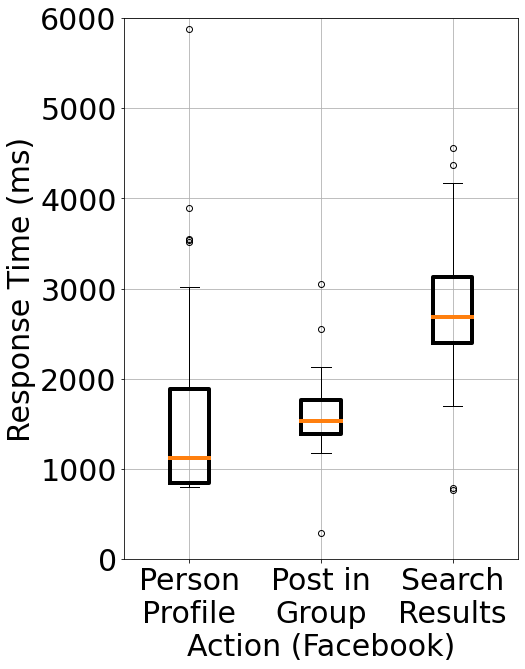

In [ ]:
filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Person\nProfile', 'Post in\nGroup', 'Search\nResults']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Facebook)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 6000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'facebook_morning.pdf', bbox_inches='tight')

In [ ]:
count

3

In [ ]:
rowvalues = df[df['APP'] == 'LinkedIn'].index.values[0:3]
rowvalues

array([19, 20, 21])

Median Value:  1365.0
Median Value:  986.0
Median Value:  665.5


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


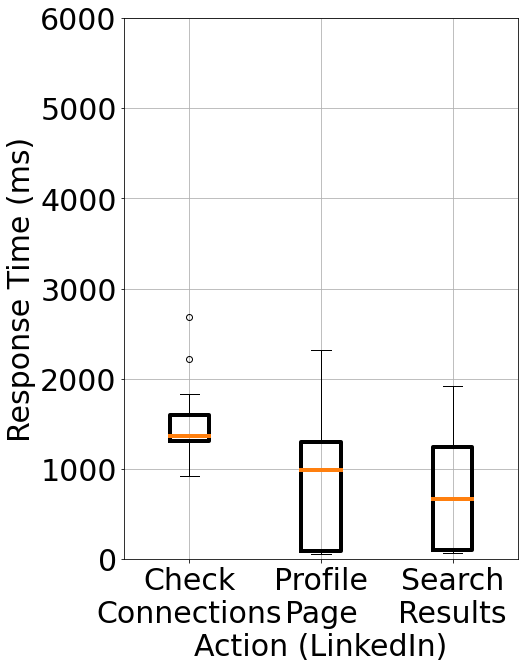

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10
plt.rcParams.update({'figure.autolayout': True})

SMALL_SIZE = 30
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Check\nConnections', 'Profile\nPage', 'Search\nResults']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (LinkedIn)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 6000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'linkedin_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'GoogleNews'].index.values
rowvalues

array([15])

Median Value:  3024.5


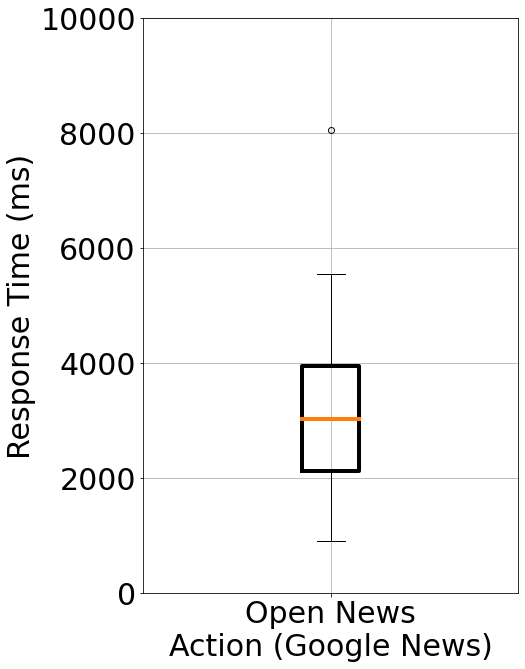

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Open News']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Google News)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'googlenews_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'Dailyhunt'].index.values
#rowvalues = rowvalues[0:-1]
rowvalues

array([5])

Median Value:  2186.0


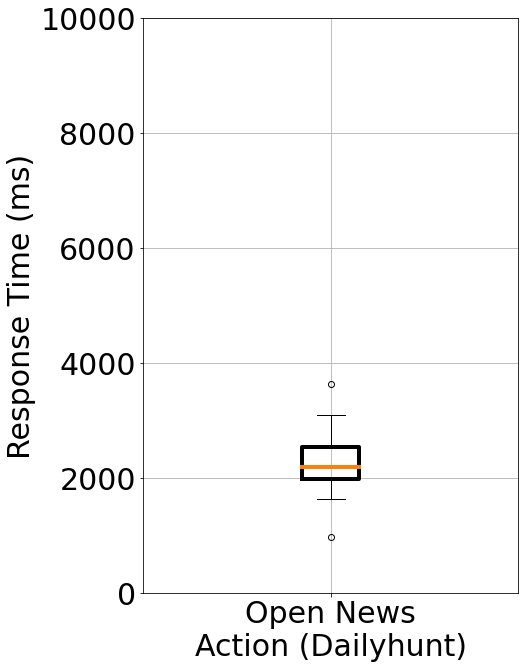

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Open News']
#print(filtered_data, xlabels)
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Dailyhunt)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 10000])

#print(np.median(filtered_data[0]), xlabels)

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'dailyhunt_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'Whatsapp'].index.values
rowvalues

array([25])

Median Value:  1357.5


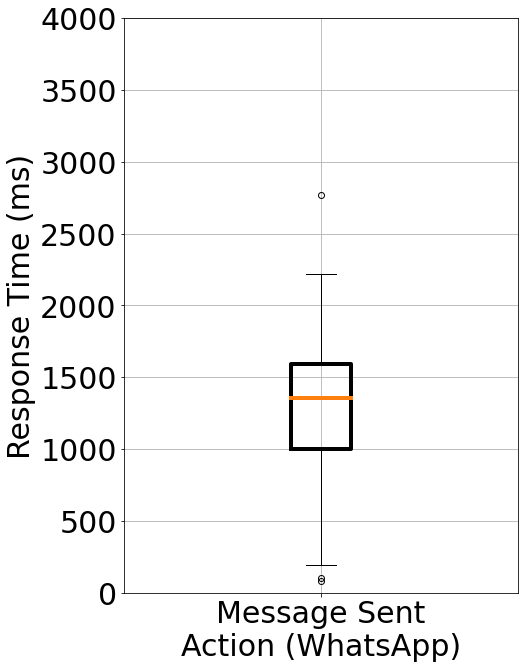

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Message Sent']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (WhatsApp)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'whatsapp_Hotspot.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'Telegram'].index.values
rowvalues

array([24])

Median Value:  256.0


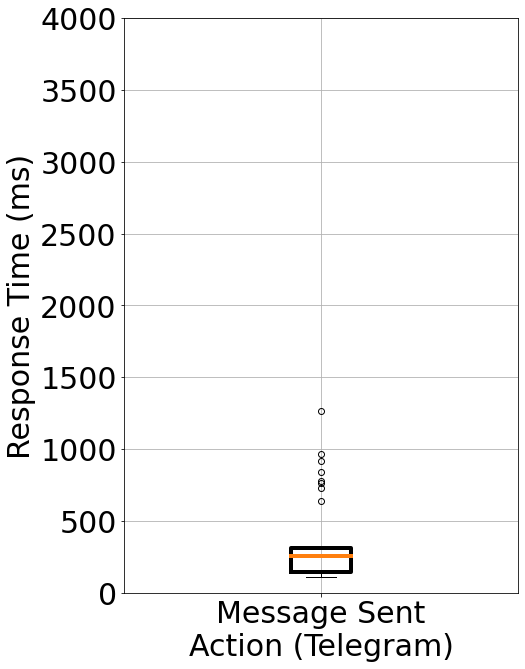

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Message Sent']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Telegram)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 4000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'telegram_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'Paytm'].index.values[[-1]]
rowvalues

array([23])

Median Value:  701.5


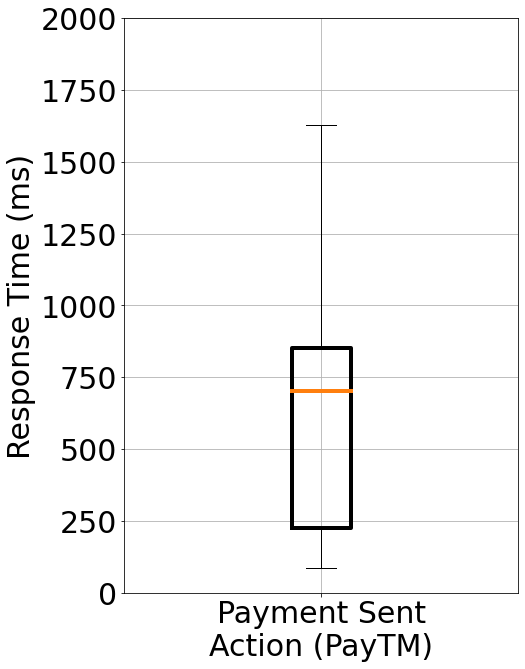

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Payment Sent']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (PayTM)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 2000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'paytm_morning.pdf', bbox_inches='tight')

In [ ]:
rowvalues = df[df['APP'] == 'GoogleMaps'].index.values
rowvalues

array([14])

Median Value:  2975.0


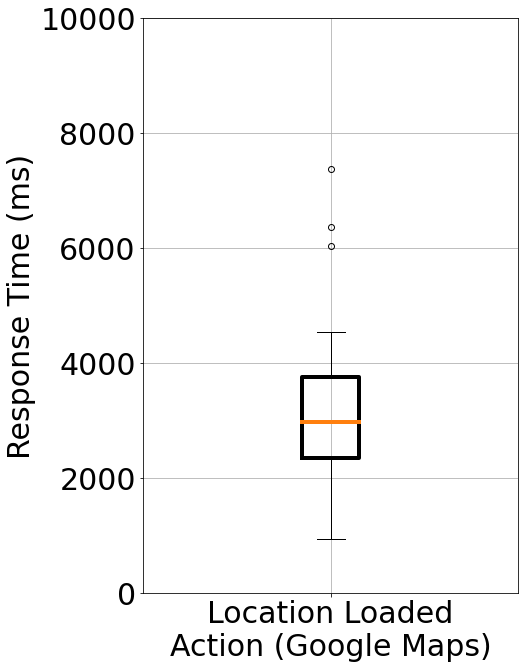

In [ ]:
mlt.rcParams['figure.figsize'] = 8, 10

filtered_data = [0] * len(rowvalues)
xlabels = [0] * len(rowvalues)
count = 0
for rownum in rowvalues:
    values = df.iloc[rownum, 1:-2].values
    values = values[values != 0]
    print("Median Value: ", np.median(values))
    filtered_data[count] = values
    xlabels[count] = df.iloc[rownum, -1]
    count += 1
xlabels=['Location Loaded']
plt.grid()
plt.boxplot(filtered_data, labels=xlabels, boxprops=boxprops, medianprops=medianprops)
plt.xlabel('Action (Google Maps)')
plt.ylabel('Response Time (ms)')
plt.ylim([0, 10000])

#plt.show()
plt.savefig('/content/drive/MyDrive/ResponseTime_wrt_time_net/Plots/Jumbo/'+'googlemap_morning.pdf', bbox_inches='tight')

In [ ]:
# !zip -r /content/drive/MyDrive/SummerSem/Response_Time_Test/Plots_4GB

# !zip -r /content/drive/MyDrive/SummerSem/Response_Time_Test/file.zip/content/Folder_To_Zip


In [ ]:
# from google.colab import files

# files.download("/content/file.zip")
# files.download("/content/drive/MyDrive/SummerSem/Response_Time_Test/Plots_4GB.zip")